# 0. Setup

## 0.1 Import Libraries

In [30]:
from irods.session import iRODSSession
from irods.meta import iRODSMeta
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## 0.2 Define Variables

In [28]:
IRODS_URL = "kcs-ediaqi-kdp.demo.know-center.at"
IRODS_PORT = 1247
IRODS_USER = "y"
IRODS_PASSWORD = "y"
IRODS_ZONE = "ediaqi"
IRODS_COLLECTION = "/ediaqi/home/test2"

# 1. Read Folders/Files

## 1.1. Discover Subcollections & Files

In [29]:
with iRODSSession(host=IRODS_URL, port=IRODS_PORT, user=IRODS_USER, password=IRODS_PASSWORD, zone=IRODS_ZONE) as session:
    coll = session.collections.get( IRODS_COLLECTION )
    
    print(f'There are {len(coll.subcollections)} folders:')
    for col in coll.subcollections:
        print(col)
    
    print("--------")
    
    print(f'There are {len(coll.data_objects)} files:')
    for obj in coll.data_objects:
        print( obj )

There are 0 folders:
--------
There are 2 files:
<iRODSDataObject 10044 PM10_THI_FE_002.csv>
<iRODSDataObject 10059 PM10_THI_FE_005-review.csv>


## 1.2. Get Desired Files from a specific directory

In [22]:
files = {}

with iRODSSession(host=IRODS_URL, port=IRODS_PORT, user=IRODS_USER, password=IRODS_PASSWORD, zone=IRODS_ZONE) as session:  
    coll = session.collections.get(IRODS_COLLECTION)
    for obj in coll.data_objects:
        files.update({ obj.name: obj})
files

{'PM10_THI_FE_002.csv': <iRODSDataObject 10044 PM10_THI_FE_002.csv>,
 'PM10_THI_FE_005-review.csv': <iRODSDataObject 10059 PM10_THI_FE_005-review.csv>}

# 1.3 Copy to Working Directory

In [23]:
for name, file in files.items():
    print(f'Processing {name}')
    with file.open('r') as input_file:
        with open(name, 'w') as output_file:
            for line in input_file.readlines():
                output_file.write(line.decode('utf8'))
print('Done.')

Processing PM10_THI_FE_002.csv
Processing PM10_THI_FE_005-review.csv
Done.


# 2. Read into Data Frame

## 2.1 Read from iRODS

In [24]:
df = pd.read_csv( files['PM10_THI_FE_005-review.csv'].open('r') )

## 2.2 Convert from a Dowloaded file

In [ ]:
df = pd.read_csv("PM10_THI_FE_002.csv")

## 2.3 Convert the DataFrame

In [25]:
df['start_time'] = df['phenomenonTime'].apply(lambda x: x.split('/')[0])
df['start_time'] = pd.to_datetime(df['start_time'])

# 3. Plotting

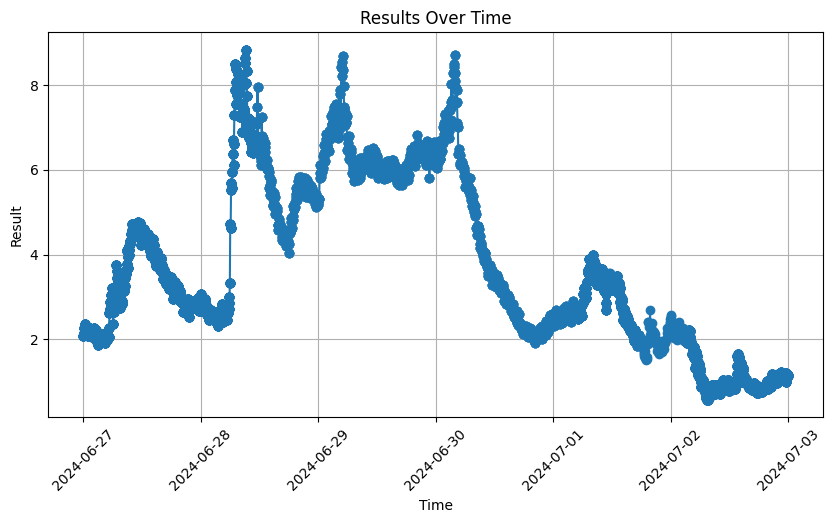

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(df['start_time'], df['result'], marker='o')

plt.xlabel('Time')
plt.ylabel('Result')
plt.title('Results Over Time')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()